In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import string
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
#Display dataframe
from IPython.display import display

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [5]:
tracks=pd.read_csv('tracks_transformed.csv',na_filter=False)

In [6]:
tracks.head()

,id,name,artists,id_artists,genres,release_year,duration_s,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,35iwgR4jXetI318WEWsa1Q,Carve,Uli,['45tIt06XoI0Iio4LBEVpls'],,1922,126.903,6,0.645,0.4450,0,46.662,1,0.4510,0.674,0.7440,0.151,0.127,104.851
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,Fernando Pessoa,['14jtPCOoNZwquk5wd9DxrY'],,1922,98.200,0,0.695,0.2630,0,37.864,1,0.9570,0.797,0.0000,0.148,0.655,102.009
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],tango vintage tango,1922,181.640,0,0.434,0.1770,1,38.820,1,0.0512,0.994,0.0218,0.212,0.457,130.418
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],tango vintage tango,1922,176.907,0,0.321,0.0946,7,32.039,1,0.0504,0.995,0.9180,0.104,0.397,169.980
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,Dick Haymes,['3BiJGZsyX9sJchTqcSA7Su'],adult standards big band easy listening lounge...,1922,163.080,0,0.402,0.1580,3,43.100,0,0.0390,0.989,0.1300,0.311,0.196,103.220


In [7]:
artists=pd.read_csv('artists_transformed.csv')

In [9]:
#drop rows with null values
artists.dropna(inplace=True)

In [10]:
#converting followers to numeric
artists['followers']=pd.to_numeric(artists['followers'])

In [11]:
artists.head()

,id,followers,genres,name,popularity
45,0VLMVnVbJyJ4oyZs2L3Yl2,71.0,carnaval cadiz,Las Viudas De Los Bisabuelos,6
46,0dt23bs4w8zx154C5xdVyl,63.0,carnaval cadiz,Los De Capuchinos,5
47,0pGhoB99qpEJEsBQxgaskQ,64.0,carnaval cadiz,Los “Pofesionales”,7
48,3HDrX2OtSuXLW5dLR85uN3,53.0,carnaval cadiz,Los Que No Paran De Rajar,6
136,22mLrN5fkppmuUPsHx6i2G,59.0,classical harp harp,Vera Dulova,3


In [12]:
genres=pd.read_csv('data_by_genres_o.csv',na_filter=False)

In [13]:
genres.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


DATA ANALYSIS ON TRACKS, ARTISTS AND GENRE

In [15]:
tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
release_year,465554.0,1987.747060,23.389721,1922.000,1973.0000,1991.00000,2007.0000,2021.000
duration_s,465554.0,230.048606,122.924611,3.344,175.2675,214.53300,262.3870,5621.218
popularity,465554.0,28.018198,18.905143,0.000,12.0000,28.00000,42.0000,100.000
danceability,465554.0,0.562158,0.167687,0.000,0.4500,0.57500,0.6860,0.991
energy,465554.0,0.535861,0.251930,0.000,0.3370,0.54200,0.7410,1.000
key,465554.0,5.222696,3.519889,0.000,2.0000,5.00000,8.0000,11.000
loudness,465554.0,49.711905,5.111613,0.000,47.0540,50.69700,53.4390,65.376
mode,465554.0,0.657155,0.474661,0.000,0.0000,1.00000,1.0000,1.000
speechiness,465554.0,0.092993,0.156136,0.000,0.0337,0.04340,0.0713,0.971
acousticness,465554.0,0.451983,0.348438,0.000,0.0999,0.42700,0.7860,0.996


In [16]:
#RESULTS-
#1) There are tracks from 1922 to 2021 in this dataset.
#2) The mean danceability of song is 0.563.
#3) The mean accousticness of song is  0.452.

In [17]:
artists.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
followers,298610.0,38506.674743,500715.449177,0.0,157.0,894.0,5221.75,78900234.0
popularity,298610.0,19.535937,17.527959,0.0,4.0,16.0,32.00,100.0


In [18]:
#The mean following of a song is 38k whereas max following is 78.90M.
#The mean popularity of a song is 19.53.

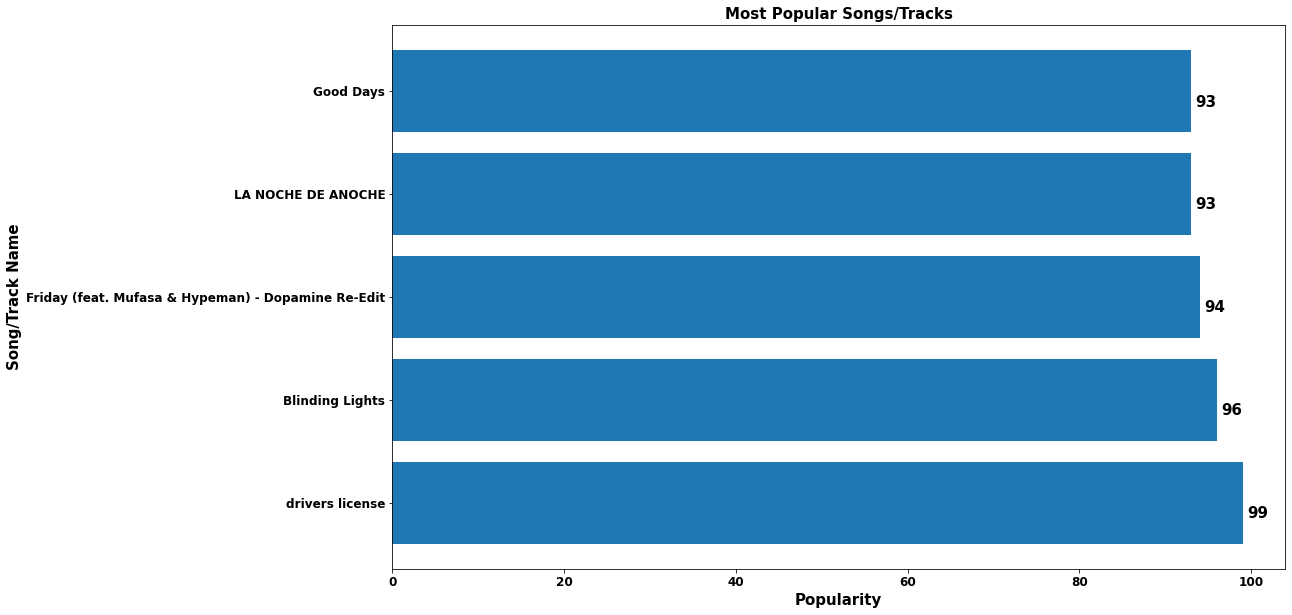

In [27]:
# Most popular tracks 
popular_songs=tracks.groupby('name')['popularity'].mean().sort_values(ascending=False).head()

plt.figure(figsize=(16,10))
plt.barh(popular_songs.index,popular_songs)
plt.title('Most Popular Songs/Tracks', fontdict=dict(fontsize=15), fontweight='bold')
plt.xlabel('Popularity', fontdict=dict(fontsize=15), fontweight='bold')
plt.ylabel('Song/Track Name', fontdict=dict(fontsize=15), fontweight='bold')
plt.xticks(fontsize='large', weight='bold')
plt.yticks(fontsize='large', weight='bold')
for i, v in enumerate(popular_songs):
    plt.text(v+0.5, i-0.15, str(int(v)), fontdict=dict(fontsize=15), fontweight='bold')
plt.show()

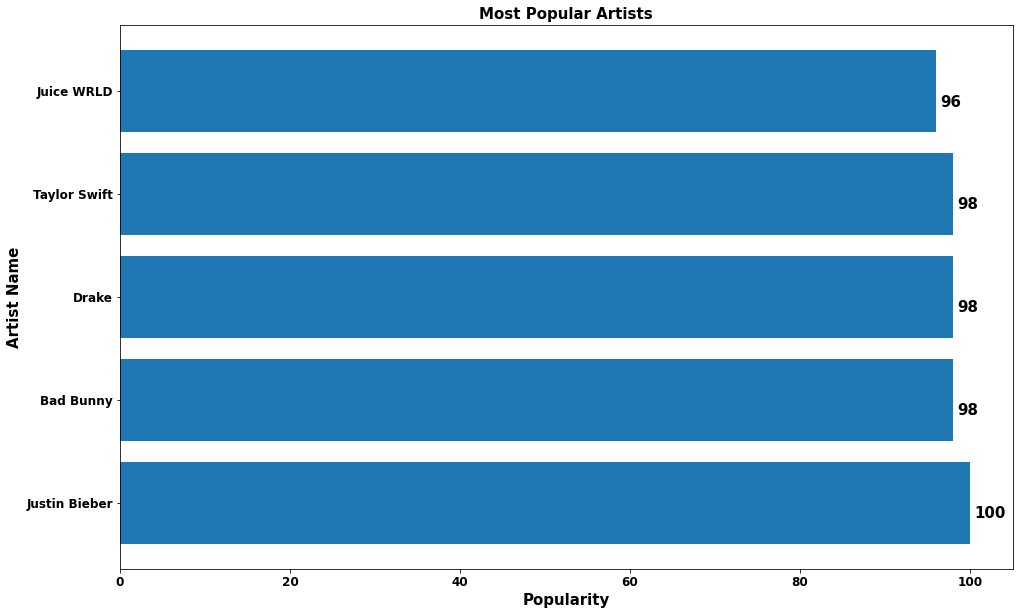

In [34]:
# Most popular artists
popular_artists = artists.groupby('name')['popularity'].mean().sort_values(ascending=False).head()

plt.figure(figsize=(16, 10))
plt.barh(popular_artists.index, popular_artists)
plt.title('Most Popular Artists', fontdict=dict(fontsize=15), fontweight='bold')
plt.xlabel('Popularity', fontdict=dict(fontsize=15), fontweight='bold')
plt.ylabel('Artist Name', fontdict=dict(fontsize=15), fontweight='bold')
plt.xticks(fontsize='large', weight='bold')
plt.yticks(fontsize='large', weight='bold')
for i, v in enumerate(popular_artists):
    plt.text(v+0.5, i-0.15, str(int(v)), fontdict=dict(fontsize=15), fontweight='bold')
plt.show()

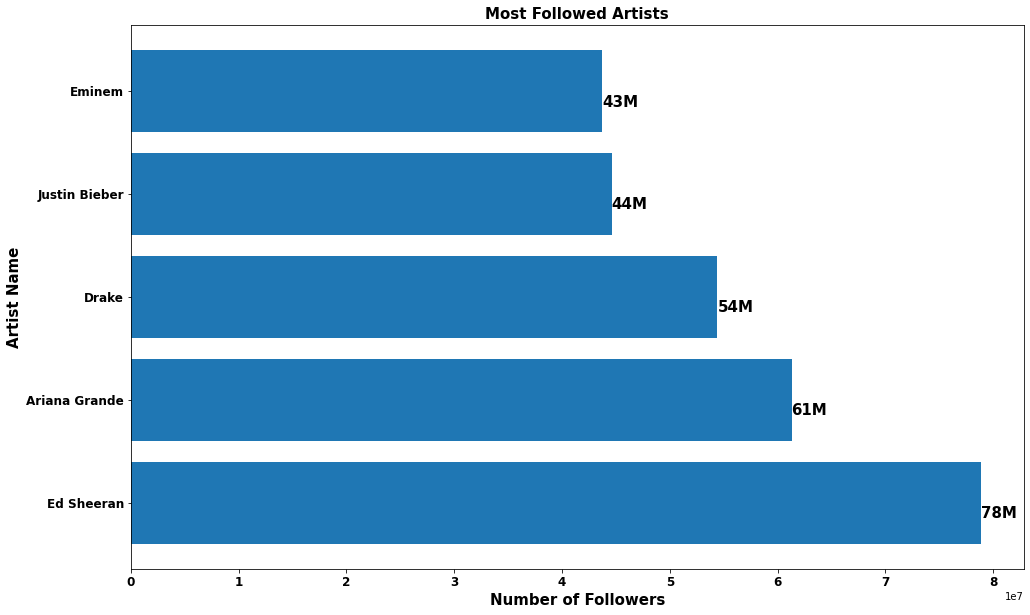

In [37]:
# Most followed artists
popular_artists = artists.groupby('name')['followers'].mean().sort_values(ascending=False).head()
plt.figure(figsize=(16, 10))
plt.barh(popular_artists.index, popular_artists)
plt.title('Most Followed Artists', fontdict=dict(fontsize=15), fontweight='bold')
plt.xlabel('Number of Followers', fontdict=dict(fontsize=15), fontweight='bold')
plt.ylabel('Artist Name', fontdict=dict(fontsize=15), fontweight='bold')
plt.xticks(fontsize='large', weight='bold')
plt.yticks(fontsize='large', weight='bold')
for i, v in enumerate(popular_artists):
    plt.text(v+0.5, i-0.15, str(int(v//1000000))+'M', fontdict=dict(fontsize=15), fontweight='bold')
plt.show()

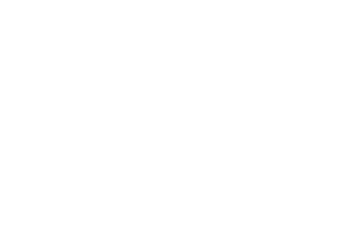

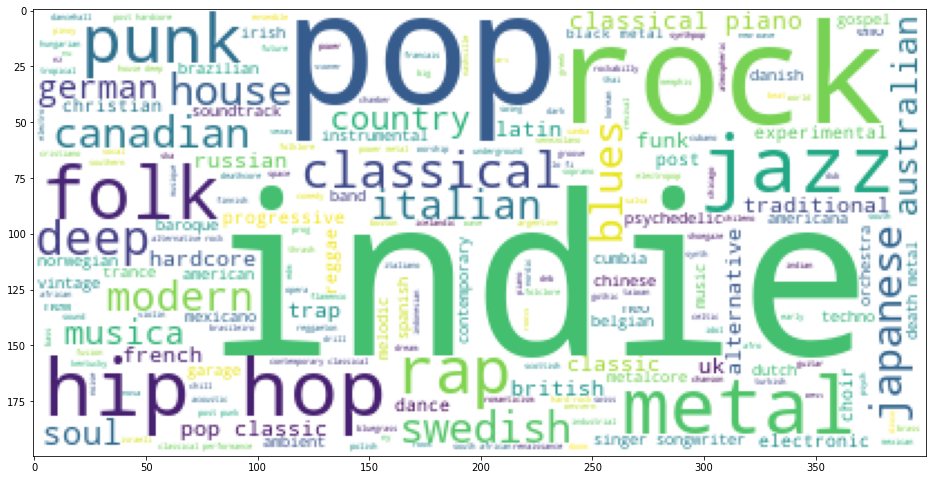

In [40]:
# GENRE WORDCLOUD
# Text from "genre" column in genres data
genre_text=' '.join(genre for genre in genres.genres.astype(str))
#Generate wordcloud using text
wc = WordCloud(background_color="white")
wordcloud = wc.generate(genre_text)

plt.axis('off')
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud)
plt.show()

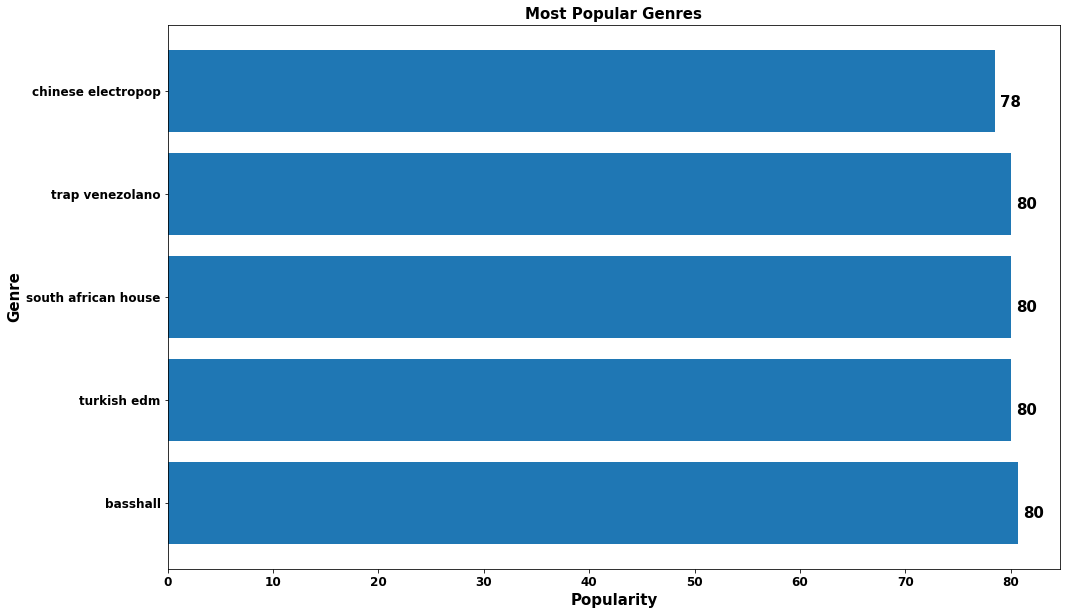

In [41]:
# Most popular genres
popular_genres = genres.groupby('genres')['popularity'].mean().sort_values(ascending=False).head()

plt.figure(figsize=(16, 10))
plt.barh(popular_genres.index, popular_genres)
plt.title('Most Popular Genres', fontdict=dict(fontsize=15), fontweight='bold')
plt.xlabel('Popularity', fontdict=dict(fontsize=15), fontweight='bold')
plt.ylabel('Genre', fontdict=dict(fontsize=15), fontweight='bold')
plt.xticks(fontsize='large', weight='bold')
plt.yticks(fontsize='large', weight='bold')
for i, v in enumerate(popular_genres):
    plt.text(v+0.5, i-0.15, str(int(v)), fontdict=dict(fontsize=15), fontweight='bold')
plt.show()

Now I have built a content-based recommendation system based on **vector space model**. To use the genre information (text data) in the vector space model, I have transformed the genres text into a vector using the **CountVectorizer** tool available in the sklearn library. Finally, the similarity between two songs is determined using the **cosine similarity metric**, based on the vectors generated for each song.

In [110]:
song_library = tracks.sort_values(by=['popularity'], ascending=False).head(10000)
# Drop "id_artists" field from DataFrame
song_library.drop(['id_artists'], axis=1, inplace=True)
# Reset index for DataFrame
song_library.reset_index(inplace=True, drop=True)
song_library.head()

,id,name,artists,genres,release_year,duration_s,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),"Justin Bieber, Daniel Caesar, Giveon",pop rb canadian contemporary rb pop rb canadia...,2021,198.082,100,0.677,0.696,0,53.819,1,0.1190,0.3210,0.000000,0.420,0.464,90.030
1,7lPN2DXiMsVn7XUKtOW1CS,drivers license,Olivia Rodrigo,pop postteen pop,2021,242.014,99,0.585,0.436,10,51.239,1,0.0601,0.7210,0.000013,0.105,0.132,143.874
2,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,Masked Wolf,australian hip hop,2021,132.780,98,0.778,0.695,4,53.135,0,0.0913,0.1750,0.000000,0.150,0.472,149.996
3,6tDDoYIxWvMLTdKpjFkc1B,telepatía,Kali Uchis,colombian pop pop,2020,160.191,97,0.653,0.524,11,50.984,0,0.0502,0.1120,0.000000,0.203,0.553,83.970
4,5QO79kh1waicV47BqGRL3g,Save Your Tears,The Weeknd,canadian contemporary rb canadian pop pop,2020,215.627,97,0.680,0.826,0,54.513,1,0.0309,0.0212,0.000012,0.543,0.644,118.051


In [111]:
#Now we will use CountVectorizer object to transform text into vector
song_vectorizer = CountVectorizer()
song_vectorizer.fit(song_library['genres'])

CountVectorizer()

In [112]:
def song_recommender(song_name):
  try:
    num_cols = ['release_year', 'duration_s', 'popularity', 'danceability', 'energy', 'key', 'loudness',
                    'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
    #create vector from 'genres' for given song
    text_vec1 = song_vectorizer.transform(song_library[song_library['name']==str(song_name)]['genres']).toarray()
    #create vector from numerical_values for given song
    num_vec1 = song_library[song_library['name']==str(song_name)][num_cols].to_numpy()
    sim_scores=  []
    #determine cosine similarity of every song with given song
    for index, row in song_library.iterrows():
            name = row['name']
            text_vec2 = song_vectorizer.transform(song_library[song_library['name']==name]['genres']).toarray()
            num_vec2 = song_library[song_library['name']==name][num_cols].to_numpy()
            #calculating cosine similarity using text vectors
            text_sim = cosine_similarity(text_vec1, text_vec2)[0][0]
            #calculating cosine similarity using numerical vectors
            num_sim = cosine_similarity(num_vec1, num_vec2)[0][0]

            sim = (text_sim + num_sim)/2
            sim_scores.append(sim)
        # Add new column containing similarity scores to song_library DataFrame
    song_library['similarity'] = sim_scores
    #sort dataframe based on 'similarity'
    song_library.sort_values(by=['similarity', 'popularity', 'release_year'], ascending=[False, False, False], inplace=True)
    #create a dataframe containing songs which are most similar to given song
    recommended_songs = song_library[['name', 'artists', 'release_year']][2:7]
    return recommended_songs
  except:
    print('{} not found in songs library.'.format(song_name))      


In [113]:
song_recommender('Blinding Lights')

,name,artists,release_year
769,Heartless,Kanye West,2008
3402,Reminder,The Weeknd,2016
6168,False Alarm,The Weeknd,2016
4037,In The Night,The Weeknd,2015
9860,What You Need,The Weeknd,2012


In [116]:
#ARTIST RECOMMENDER
# Sort artists data based on popularity and take first 10,000 records
artist_library = artists.sort_values(by=['popularity', 'followers'], ascending=[False, False]).head(10000)

# Reset index for DataFrame
artist_library.reset_index(inplace=True, drop=True)

# Display first 5 records
artist_library.head()

,id,followers,genres,name,popularity
0,1uNFoZAHBGtllmzznpCI3s,44606973.0,canadian pop pop postteen pop,Justin Bieber,100
1,3TVXtAsR1Inumwj472S9r4,54416812.0,canadian hip hop canadian pop hip hop pop rap ...,Drake,98
2,06HL4z0CvFAxyc27GXpf02,38869193.0,pop postteen pop,Taylor Swift,98
3,4q3ewBCX7sLwd24euuV69X,32244734.0,latin reggaeton trap latino,Bad Bunny,98
4,3Nrfpe0tUJi4K4DXYWgMUX,31623813.0,kpop kpop boy group,BTS,96


In [117]:
artist_vectorizer = CountVectorizer()
artist_vectorizer.fit(artist_library['genres'])

CountVectorizer()

In [118]:
# Function to recommend more artists based on given artist name
def artist_recommender(artist_name):
    try:
        # Numeric columns (audio features) in artist_library DataFrame
        num_cols = ['followers', 'popularity']
        # Create vector from "genres" field (text data) for given artist
        text_vec1 = artist_vectorizer.transform(artist_library[artist_library['name']==str(artist_name)]['genres']).toarray()
        num_vec1 = artist_library[artist_library['name']==str(artist_name)][num_cols].to_numpy()

        sim_scores = []
        for index, row in artist_library.iterrows():
            name = row['name']
            text_vec2 = artist_vectorizer.transform(artist_library[artist_library['name']==name]['genres']).toarray()
            num_vec2 = artist_library[artist_library['name']==name][num_cols].to_numpy()
            text_sim = cosine_similarity(text_vec1, text_vec2)[0][0]
            num_sim = cosine_similarity(num_vec1, num_vec2)[0][0]
            sim = (text_sim + num_sim)/2
            sim_scores.append(sim)

        artist_library['similarity'] = sim_scores
        artist_library.sort_values(by=['similarity', 'popularity', 'followers'], ascending=[False, False, False], inplace=True)
        recommended_artists = artist_library[['name', 'genres', 'followers', 'popularity']][2:7]
        recommended_artists.sort_values(by=['popularity', 'followers'], ascending=[False, False], inplace=True)
        return recommended_artists
    except:
        print('{} not found in artists library.'.format(artist_name))

In [120]:
artist_recommender('Arijit Singh')

,name,genres,followers,popularity
638,Jubin Nautiyal,desi pop filmi modern bollywood,887733.0,77
1220,Armaan Malik,desi pop filmi modern bollywood,9250478.0,72
2013,Neeti Mohan,desi pop filmi modern bollywood,957869.0,69
2039,Amaal Mallik,desi pop filmi modern bollywood,812363.0,69
3007,Palak Muchhal,desi pop filmi modern bollywood,1604308.0,66


In [121]:
#Complete recommender
# Function to recommend similar songs and artists based on song name
def spotify_recommender(song_name):
    try:
        # Get DataFrame of recommended songs using song_recommender() function
        recommended_songs = song_recommender(song_name)
        # Create empty DataFrame to store details of recommended artists
        recommended_artists = pd.DataFrame({'name':[], 'genres':[], 'followers':[], 'popularity':[]})
        # Get contributing artists for given song
        artists = song_library[song_library['name']==str(song_name)]['artists'].values[0].split(',')
        # For each contributing artist, get recommended artists using artist_recommender() function
        for artist in artists:
            artist_name = artist.strip()
            # Concatenate returned DataFrame with recommended_artists DataFrame
            recommended_artists = pd.concat([recommended_artists, artist_recommender(artist_name)])
            # Sort DataFrame based on "popularity" and "followers" columns
        recommended_artists.sort_values(by=['popularity', 'followers'], ascending=[False, False], inplace=True)
        # Display recommended songs    
        print('More songs you might like:')
        display(recommended_songs)
        # Display recommended artists
        print('\n\nOther artists you might like:')
        display(recommended_artists.head())
    except:
        # If given song is not found in song library then display message
        print('{} not found in songs library.'.format(song_name))

In [128]:
spotify_recommender('Blinding Lights')

More songs you might like:


,name,artists,release_year
769,Heartless,Kanye West,2008
3402,Reminder,The Weeknd,2016
6168,False Alarm,The Weeknd,2016
4037,In The Night,The Weeknd,2015
9860,What You Need,The Weeknd,2012




Other artists you might like:


,name,genres,followers,popularity
281,Alessia Cara,alt z canadian contemporary rb canadian pop da...,8717631.0,81.0
1124,Ruth B.,alt z canadian contemporary rb canadian pop in...,1045287.0,73.0
3404,Anjulie,canadian pop,22949.0,66.0
3841,Francesco Yates,canadian pop,36348.0,65.0
7927,Trevor Guthrie,canadian pop,10224.0,59.0
